In [19]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Ignore warnings (clean output)
import warnings
warnings.filterwarnings('ignore')
import os

In [20]:
file_path = r"D:\My Work\Data science\Sales_Revenue_Analysis\Sample - Superstore.csv"

df = pd.read_csv(file_path, encoding='latin1')

print("Data loaded successfully!")
df.head()


Data loaded successfully!


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [21]:
df.columns = df.columns.str.strip()

print("Shape:", df.shape)
print("\nColumns:\n", df.columns)


Shape: (9994, 21)

Columns:
 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [22]:
save_folder = r"D:\My Work\Data science\Sales_Revenue_Analysis\plots"
os.makedirs(save_folder, exist_ok=True)


In [11]:
# Total Sales & Profit
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")


Total Sales: $2,297,200.86
Total Profit: $286,397.02


In [12]:
category_summary = (
    df.groupby('Category')[['Sales', 'Profit']]
    .sum()
    .sort_values(by='Sales', ascending=False)
)

category_summary


,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


In [13]:
top_products = (
    df.groupby('Product Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

In [27]:
profit_by_region = (
    df.groupby('Region')['Profit']
    .sum()
    .sort_values(ascending=False)
)

profit_by_region


Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64

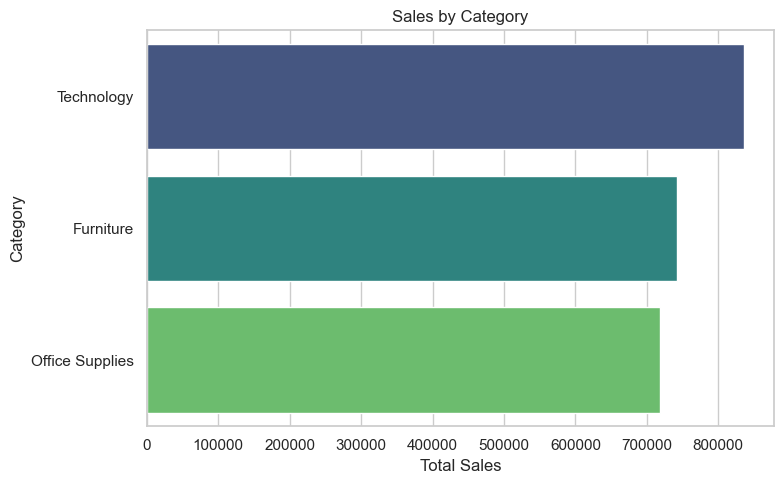

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=sales_by_category.values,
    y=sales_by_category.index,
    hue=sales_by_category.index,
    palette='viridis',
    legend=False
)
plt.title("Sales by Category")
plt.xlabel("Total Sales")
plt.ylabel("Category")

plt.tight_layout()
plt.savefig(os.path.join(save_folder, "sales_by_category.png"))
plt.show()



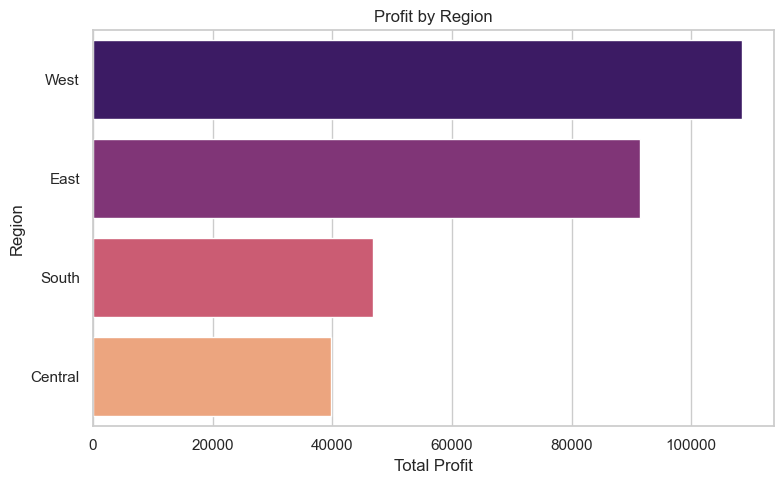

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=profit_by_region.values,
    y=profit_by_region.index,
    hue=profit_by_region.index,
    palette='magma',
    legend=False
)
plt.title("Profit by Region")
plt.xlabel("Total Profit")
plt.ylabel("Region")

plt.tight_layout()
plt.savefig(os.path.join(save_folder, "profit_by_region.png"))
plt.show()


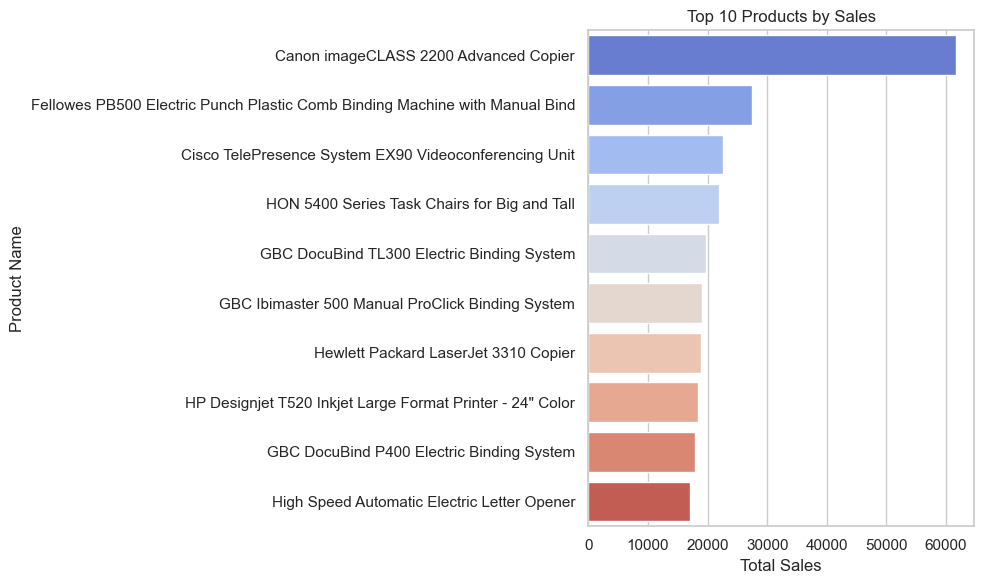

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_products.values,
    y=top_products.index,
    hue=top_products.index,
    palette='coolwarm',
    legend=False
)
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")

plt.tight_layout()
plt.savefig(os.path.join(save_folder, "top_10_products.png"))
plt.show()



In [31]:
print("Sales Revenue Analysis completed successfully.")
print("All plots saved in:", save_folder)


Sales Revenue Analysis completed successfully.
All plots saved in: D:\My Work\Data science\Sales_Revenue_Analysis\plots
